In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.preprocessing import image
from keras.applications.efficientnet import preprocess_input, decode_predictions
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import ipywidgets as widgets
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
# from IPython.display import Image, display

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Path Variables 

In [6]:
#Path to the directory containing efficientnetb3 model
path = "/kaggle/input/efnetb3-mbnetv2-v2/efb3_mbnetv2/efficientnetb3-Plant Village Disease-99.83.h5"

weight_path = "/kaggle/input/efnetb3-mbnetv2-v2/efb3_mbnetv2/efficientnetb3-Plant Village Disease-weights.h5"

#Path to the CSV file containing Class Labels
csv_path = "/kaggle/input/plant-classes/Plant Village Disease-class_dict.csv"

## Loading The Model
Model Used - EffcientnetB3 

In [7]:
# Load the pretrained model
model = tf.keras.models.load_model(path)
model.load_weights(weight_path)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 1536)              6144      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               393472    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 38)                9766      
                                                                 
Total params: 11192917 (42.70 MB)
Trainable params: 1110

## Loading Class Labels

In [8]:
# Load custom class labels from the second column of the CSV file
class_labels = pd.read_csv(csv_path, header=0).iloc[:, 1].tolist()
print(class_labels)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

## Image Preprossing

In [9]:
# Preprocess the image
def load_and_preprocess_image(img_path):
    # Load the image with the target size for the model (224x224 for MobileNet)
    img = image.load_img(img_path, target_size=(224, 224))
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    # Expand dimensions to match the input shape the model expects (1, 224, 224, 3)
    img_array = np.expand_dims(img_array, axis=0)
    # Preprocess the image (normalization specific to the model)
    img_array = preprocess_input(img_array)
    return img_array

## Image Prediction Function

In [10]:
# Pass the image through the model to get a prediction
def predict_image_class(img_path):
    # Preprocess the image
    preprocessed_image = load_and_preprocess_image(img_path)
    # Predict the class
    predictions = model.predict(preprocessed_image)
    # Get the index of the highest probability class
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    print(predicted_class_index)
    # Get the label of the predicted class
    predicted_class_label = class_labels[predicted_class_index]
    return predicted_class_label

## Uploading leaf image for predicton

In [11]:
uploader = widgets.FileUpload(accept='image/*', multiple=False)
display(uploader)

FileUpload(value={}, accept='image/*', description='Upload')

## Predction Results

1/1 [==============================] - 3s 3s/step
0


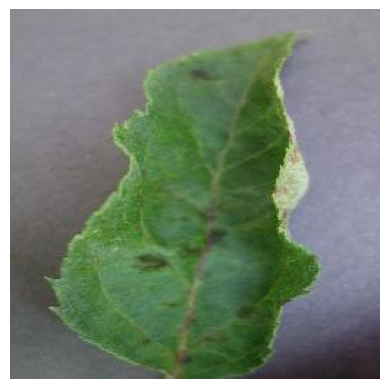

Predicted Class:  Apple___Apple_scab


In [12]:
if len(uploader.value) > 0:
    # Get the uploaded file
    uploaded_file = list(uploader.value.values())[0]
    # Save the uploaded file to a temporary path
    temp_img_path = "/tmp/temp_image"
    with open(temp_img_path, 'wb') as f:
        f.write(uploaded_file['content'])

    # Make a prediction
    prediction = predict_image_class(temp_img_path)

    # Display the uploaded image
    img = Image.open(temp_img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Display the prediction
    print("Predicted Class: ", prediction)
else:
    print("!! Upload an Image !!")

## Visualition

In [ ]:
# model.layers[0].summary()

In [ ]:
# model.layers[0].layers[-2].name

In [ ]:
# # model_builder = keras.applications.xception.Xception
# img_size = (299, 299)
# preprocess_input = keras.applications.xception.preprocess_input
# decode_predictions = keras.applications.xception.decode_predictions

# last_conv_layer_name = "top_activation"

# # The local path to our target image
# img_path = '/kaggle/input/plantdoc-dataset/test/Apple_leaf/test_Apple leaf_1.jpg'
# display(Image(img_path))

In [ ]:
# def get_img_array(img_path, size):
#     # `img` is a PIL image of size 299x299
#     img = keras.utils.load_img(img_path, target_size=size)
#     # `array` is a float32 Numpy array of shape (299, 299, 3)
#     array = keras.utils.img_to_array(img)
#     # We add a dimension to transform our array into a "batch"
#     # of size (1, 299, 299, 3)
#     array = np.expand_dims(array, axis=0)
#     return array


# def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
#     # First, we create a model that maps the input image to the activations
#     # of the last conv layer as well as the output predictions
#     grad_model = keras.models.Model(
#         model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
#     )

#     # Then, we compute the gradient of the top predicted class for our input image
#     # with respect to the activations of the last conv layer
#     with tf.GradientTape() as tape:
#         last_conv_layer_output, preds = grad_model(img_array)
#         if pred_index is None:
#             pred_index = tf.argmax(preds[0])
#         class_channel = preds[:, pred_index]

#     # This is the gradient of the output neuron (top predicted or chosen)
#     # with regard to the output feature map of the last conv layer
#     grads = tape.gradient(class_channel, last_conv_layer_output)

#     # This is a vector where each entry is the mean intensity of the gradient
#     # over a specific feature map channel
#     pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

#     # We multiply each channel in the feature map array
#     # by "how important this channel is" with regard to the top predicted class
#     # then sum all the channels to obtain the heatmap class activation
#     last_conv_layer_output = last_conv_layer_output[0]
#     heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
#     heatmap = tf.squeeze(heatmap)

#     # For visualization purpose, we will also normalize the heatmap between 0 & 1
#     heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
#     return heatmap.numpy()

In [ ]:
# # Prepare image
# img_array = preprocess_input(get_img_array(img_path, size=img_size))

# # Make model
# # model = model_builder(weights="imagenet")

# # Remove last layer's softmax
# # model.layers[-1].activation = None

# # Print what the top predicted class is
# preds = model.predict(img_array)
# print("Predicted:", decode_predictions(preds, top=1)[0])

# # Generate class activation heatmap
# heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# # Display heatmap
# plt.matshow(heatmap)
# plt.show()

In [ ]:
# def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
#     # Load the original image
#     img = keras.utils.load_img(img_path)
#     img = keras.utils.img_to_array(img)

#     # Rescale heatmap to a range 0-255
#     heatmap = np.uint8(255 * heatmap)

#     # Use jet colormap to colorize heatmap
#     jet = mpl.colormaps["jet"]

#     # Use RGB values of the colormap
#     jet_colors = jet(np.arange(256))[:, :3]
#     jet_heatmap = jet_colors[heatmap]

#     # Create an image with RGB colorized heatmap
#     jet_heatmap = keras.utils.array_to_img(jet_heatmap)
#     jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
#     jet_heatmap = keras.utils.img_to_array(jet_heatmap)

#     # Superimpose the heatmap on original image
#     superimposed_img = jet_heatmap * alpha + img
#     superimposed_img = keras.utils.array_to_img(superimposed_img)

#     # Save the superimposed image
#     superimposed_img.save(cam_path)

#     # Display Grad CAM
#     display(Image(cam_path))


# save_and_display_gradcam(img_path, heatmap)

## Matrics Calculation

In [ ]:
# # Calculate metrics
# accuracy = accuracy_score(true_labels, predicted_labels)
# precision = precision_score(true_labels, predicted_labels, average='weighted')
# recall = recall_score(true_labels, predicted_labels, average='weighted')
# f1 = f1_score(true_labels, predicted_labels, average='weighted')
# conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=class_labels)

In [ ]:
# # Print the results
# print(f"Accuracy: {accuracy:.2f}")
# print(f"Precision: {precision:.2f}")
# print(f"Recall: {recall:.2f}")
# print(f"F1 Score: {f1:.2f}")
# print("Confusion Matrix:")
# print(conf_matrix)

In [ ]:
# # Visualize the confusion matrix
# plt.figure(figsize=(20, 16))
# sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Reds')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()

In [ ]:
# # Example usage
# img_path = '/kaggle/input/plantvillage-dataset/color/Grape___Esca_(Black_Measles)/00b65fe8-cee1-4b68-8ef4-1211814f2845___FAM_B.Msls 3990.JPG'
# predicted_label, predicted_score = predict_image_class(img_path)

# # Print the prediction
# print(f"Predicted class: {predicted_label} (confidence: {predicted_score:.2f})")

In [ ]:
# img = image.load_img(img_path)
# plt.imshow(img)
# plt.title(f"Predicted: {predicted_label}")
# plt.show()